In [1]:
# The pip installation may be needed ONLY IF importing yfinance does not work
# In which case, do it before executing the import statement below.

# pip install yfinance

import yfinance as yf

import os

import pandas as pd

import numpy as np
import scipy as sci


# Artificial Intelligence Portfolio

## Load & Clean Raw Data

In [2]:
# get raw data on XT, an AI ETF that tracks the IXIC, NASDAQ Composite
# Data in spreadsheet downloaded from iShares, the manager of XT

os.chdir(r"/Users/caoweicheng/Desktop/UF Assignment/AI & ML/Project - Portfolio")
raw_XT = pd.read_csv("./XT_holdings2.csv", skiprows=1) # Skip the fist 1 rows that are useless

print("Size of the dataset (row, col): ", raw_XT.shape)

raw_XT.head()

Size of the dataset (row, col):  (196, 15)


,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,NVDA,NVIDIA CORP,Information Technology,Equity,"39,417,950.52",1.17,"39,417,950.52","92,331.00",426.92,United States,NASDAQ,USD,1.00,USD,-
1,META,META PLATFORMS INC CLASS A,Communication,Equity,"36,727,262.00",1.09,"36,727,262.00","130,702.00",281.00,United States,NASDAQ,USD,1.00,USD,-
2,PLTR,PALANTIR TECHNOLOGIES INC CLASS A,Information Technology,Equity,"34,325,909.20",1.02,"34,325,909.20","2,105,884.00",16.30,United States,New York Stock Exchange Inc.,USD,1.00,USD,-
3,MDB,MONGODB INC CLASS A,Information Technology,Equity,"31,727,348.50",0.94,"31,727,348.50","83,515.00",379.90,United States,NASDAQ,USD,1.00,USD,-
4,EXAS,EXACT SCIENCES CORP,Health Care,Equity,"30,301,991.46",0.90,"30,301,991.46","324,363.00",93.42,United States,NASDAQ,USD,1.00,USD,-


In [3]:
# Delete the rows that have more than 1 NaN values
raw_XT = raw_XT.dropna(thresh=raw_XT.shape[1] - 1)

# Check the dataset
raw_XT

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,NVDA,NVIDIA CORP,Information Technology,Equity,"39,417,950.52",1.17,"39,417,950.52","92,331.00",426.92,United States,NASDAQ,USD,1.00,USD,-
1,META,META PLATFORMS INC CLASS A,Communication,Equity,"36,727,262.00",1.09,"36,727,262.00","130,702.00",281.00,United States,NASDAQ,USD,1.00,USD,-
2,PLTR,PALANTIR TECHNOLOGIES INC CLASS A,Information Technology,Equity,"34,325,909.20",1.02,"34,325,909.20","2,105,884.00",16.30,United States,New York Stock Exchange Inc.,USD,1.00,USD,-
3,MDB,MONGODB INC CLASS A,Information Technology,Equity,"31,727,348.50",0.94,"31,727,348.50","83,515.00",379.90,United States,NASDAQ,USD,1.00,USD,-
4,EXAS,EXACT SCIENCES CORP,Health Care,Equity,"30,301,991.46",0.90,"30,301,991.46","324,363.00",93.42,United States,NASDAQ,USD,1.00,USD,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,USD,USD CASH,Cash and/or Derivatives,Cash,"8,124,488.38",0.24,"8,124,488.38","8,124,488.00",100.00,United States,-,USD,1.00,USD,-
192,SPWR,SUNPOWER CORP,Industrials,Equity,"7,426,705.00",0.22,"7,426,705.00","675,155.00",11.00,United States,NASDAQ,USD,1.00,USD,-
193,DISH,DISH NETWORK CORP CLASS A,Communication,Equity,"6,689,992.94",0.20,"6,689,992.94","1,034,002.00",6.47,United States,NASDAQ,USD,1.00,USD,-
194,LUMN,LUMEN TECHNOLOGIES INC,Communication,Equity,"6,126,689.25",0.18,"6,126,689.25","2,722,973.00",2.25,United States,New York Stock Exchange Inc.,USD,1.00,USD,-


In [4]:
# Get daily open/high/low/closing values for IXIC over the past 5 years

IXIC_values = yf.download('^IXIC',start='2020-06-13',end='2023-06-13')

[*********************100%***********************]  1 of 1 completed


In [5]:
IXIC_values

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-15,9426.900391,9756.070312,9403.000000,9726.019531,9726.019531,4476010000
2020-06-16,9949.780273,9963.629883,9748.379883,9895.870117,9895.870117,4669320000
2020-06-17,9943.309570,9991.209961,9891.809570,9910.530273,9910.530273,4279700000
2020-06-18,9892.480469,9959.200195,9885.660156,9943.049805,9943.049805,4335320000
2020-06-19,10042.129883,10053.910156,9872.940430,9946.120117,9946.120117,6093830000
...,...,...,...,...,...,...
2023-06-06,13199.589844,13306.209961,13165.650391,13276.419922,13276.419922,4810910000
2023-06-07,13295.259766,13361.900391,13089.480469,13104.900391,13104.900391,5270600000
2023-06-08,13113.269531,13248.599609,13101.179688,13238.519531,13238.519531,4280160000


In [6]:
# Get IXIC closing values
IXIC_close = IXIC_values[["Close"]]

IXIC_close

,Close
Date,
2020-06-15,9726.019531
2020-06-16,9895.870117
2020-06-17,9910.530273
2020-06-18,9943.049805
2020-06-19,9946.120117
...,...
2023-06-06,13276.419922
2023-06-07,13104.900391
2023-06-08,13238.519531


In [7]:
#  Stocks that form the IXIC
XT_tickers = raw_XT['Ticker']

print(raw_XT.columns)

Index(['Ticker', 'Name', 'Sector', 'Asset Class', 'Market Value', 'Weight (%)',
       'Notional Value', 'Shares', 'Price', 'Location', 'Exchange', 'Currency',
       'FX Rate', 'Market Currency', 'Accrual Date'],
      dtype='object')


In [8]:
XT_tickers

0      NVDA
1      META
2      PLTR
3       MDB
4      EXAS
       ... 
191     USD
192    SPWR
193    DISH
194    LUMN
195      MQ
Name: Ticker, Length: 196, dtype: object

In [9]:
# Check the correct name
ticker=XT_tickers[0]

In [10]:
ticker

'NVDA'

In [11]:
# Therefore, the solution below removes such whitespace and prevents the issue 
# Create a list for all stocks
tickers=[]
for ticker in XT_tickers:
    tickers.append(ticker.strip())

## Download all 5-years price data for the ETFs

In [12]:
# get all the 5-year price data for the stocks in the IXIC
df_data_download = yf.download(tickers,start='2020-06-13',end='2023-06-13')


[*********************100%***********************]  195 of 195 completed

ERROR 
2 Failed downloads:
ERROR ['CLNX']: Exception('CLNX: No price data found, symbol may be delisted (1d 2020-06-13 -> 2023-06-13)')
ERROR ['DSY']: Exception('DSY: No price data found, symbol may be delisted (1d 2020-06-13 -> 2023-06-13)')


In [13]:
# Let's get a basic, global idea of the data
df_data_download.info()

df_data_download

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 780 entries, 2020-06-15 to 2023-06-12
Columns: 1170 entries, ('Adj Close', '002460.SZ') to ('Volume', 'ZS')
dtypes: float64(1170)
memory usage: 7.0 MB


Adj Close                                                      \
            002460.SZ   002594.SZ     006400.KS      009150.KS    0836.HK   
Date                                                                        
2020-06-15  35.292324   62.443703  346768.87500  119712.031250   7.919316   
2020-06-16  36.898777   63.951374  374132.25000  127435.375000   8.056298   
2020-06-17  36.757233   63.731716  382590.03125  126952.671875   8.054522   
2020-06-18  38.321224   66.637238  375127.28125  124539.125000   8.170094   
2020-06-19  38.554756   66.886848  383087.56250  125987.257812   8.063412   
...               ...         ...           ...            ...        ...   
2023-06-06  63.209999  260.880005           NaN            NaN  17.169493   
2023-06-07  62.299999  256.549988  735000.00000  147900.000000  16.973717   
2023-06-08  63.200001  255.000000  729000.00000  145900.000000  17.208647   
2023-06-09  63.910000  258.000000  735000.00000  147200.000000  17.658932   
2023-06-12  63.090000  260.510010  740000.00000  147400.000000  17.424000   

                                                                    ...  \
             0916.HK    1548.HK    1801.HK     2015.HK     2327.TW  ...   
Date                                                                ...   
2020-06-15  4.137035  15.560000  46.150002         NaN  437.080994  ...   
2020-06-16  4.400478  16.340000  47.750000         NaN  453.099701  ...   
2020-06-17  4.380964  16.500000  47.549999         NaN  456.532257  ...   
2020-06-18  4.263878  16.600000  48.950001         NaN  463.397400  ...   
2020-06-19  4.371207  16.240000  49.500000         NaN  462.825348  ...   
...              ...        ...        ...         ...         ...  ...   
2023-06-06  8.890000  18.299999  36.500000  120.599998  502.000000  ...   
2023-06-07  8.530000  18.799999  37.099998  125.400002  504.000000  ...   
2023-06-08  8.360000  18.600000  36.500000  124.000000  494.000000  ...   
2023-06-09  8.550000  18.660000  37.650002  125.099998  492.500000  ...   
2023-06-12  8.290000  18.260000  35.900002  123.099998  488.000000  ...   

              Volume                                                         \
                 USD       VEEV        VMW       VRTX     VWS.CO        WAT   
Date                                                                          
2020-06-15  215600.0  1246000.0  1583500.0  1385400.0  2704575.0   538000.0   
2020-06-16  295200.0  1226200.0  1254300.0  1557200.0  3355395.0   351700.0   
2020-06-17  174000.0  1296800.0  1225400.0  1645100.0  2906930.0   383500.0   
2020-06-18   96800.0  1064400.0  1420200.0  1371900.0  4584475.0  1198000.0   
2020-06-19  170800.0  2184500.0  3184600.0  4085300.0  4307460.0  1940900.0   
...              ...        ...        ...        ...        ...        ...   
2023-06-06  161000.0  1023200.0  1925700.0  1089100.0  1309861.0   293600.0   
2023-06-07  143100.0  1269600.0  1248400.0  1139600.0  1379058.0   556400.0   
2023-06-08   65500.0   679000.0   682600.0  1446800.0  2096240.0   570100.0   
2023-06-09  110500.0   790000.0   797900.0  1066200.0  1695567.0   452800.0   
2023-06-12  134300.0   836600.0  1984600.0  1417100.0  2138621.0   526200.0   

                                                        
               WLN.PA   WRT1V.HE     WTC.AX         ZS  
Date                                                    
2020-06-15   597137.0  3189565.0  1133949.0  2664600.0  
2020-06-16  1013992.0  3139189.0  1412904.0  3334300.0  
2020-06-17   753376.0  2387552.0  1200395.0  2505700.0  
2020-06-18   721790.0  6045789.0  1337067.0  5456700.0  
2020-06-19  2021221.0        NaN  1943551.0  3898100.0  
...               ...        ...        ...        ...  
2023-06-06   502185.0   511494.0   538680.0  3536800.0  
2023-06-07   345996.0   672836.0   488597.0  3660600.0  
2023-06-08   475382.0  1005252.0   569457.0  2849300.0  
2023-06-09   619660.0   622677.0   553374.0  2720600.0  
2023-06-12   488159.0   843417.0  

In [14]:
# Check all col name, and delete the col that we dont need
print(df_data_download.columns)

MultiIndex([('Adj Close', '002460.SZ'),
            ('Adj Close', '002594.SZ'),
            ('Adj Close', '006400.KS'),
            ('Adj Close', '009150.KS'),
            ('Adj Close',   '0836.HK'),
            ('Adj Close',   '0916.HK'),
            ('Adj Close',   '1548.HK'),
            ('Adj Close',   '1801.HK'),
            ('Adj Close',   '2015.HK'),
            ('Adj Close',   '2327.TW'),
            ...
            (   'Volume',       'USD'),
            (   'Volume',      'VEEV'),
            (   'Volume',       'VMW'),
            (   'Volume',      'VRTX'),
            (   'Volume',    'VWS.CO'),
            (   'Volume',       'WAT'),
            (   'Volume',    'WLN.PA'),
            (   'Volume',  'WRT1V.HE'),
            (   'Volume',    'WTC.AX'),
            (   'Volume',        'ZS')],
           length=1170)


In [15]:
# Notice below that we have gone from 1428 columns to 236 (exactly the number of stocks in IXIC)
df_data_download 

Adj Close                                                      \
            002460.SZ   002594.SZ     006400.KS      009150.KS    0836.HK   
Date                                                                        
2020-06-15  35.292324   62.443703  346768.87500  119712.031250   7.919316   
2020-06-16  36.898777   63.951374  374132.25000  127435.375000   8.056298   
2020-06-17  36.757233   63.731716  382590.03125  126952.671875   8.054522   
2020-06-18  38.321224   66.637238  375127.28125  124539.125000   8.170094   
2020-06-19  38.554756   66.886848  383087.56250  125987.257812   8.063412   
...               ...         ...           ...            ...        ...   
2023-06-06  63.209999  260.880005           NaN            NaN  17.169493   
2023-06-07  62.299999  256.549988  735000.00000  147900.000000  16.973717   
2023-06-08  63.200001  255.000000  729000.00000  145900.000000  17.208647   
2023-06-09  63.910000  258.000000  735000.00000  147200.000000  17.658932   
2023-06-12  63.090000  260.510010  740000.00000  147400.000000  17.424000   

                                                                    ...  \
             0916.HK    1548.HK    1801.HK     2015.HK     2327.TW  ...   
Date                                                                ...   
2020-06-15  4.137035  15.560000  46.150002         NaN  437.080994  ...   
2020-06-16  4.400478  16.340000  47.750000         NaN  453.099701  ...   
2020-06-17  4.380964  16.500000  47.549999         NaN  456.532257  ...   
2020-06-18  4.263878  16.600000  48.950001         NaN  463.397400  ...   
2020-06-19  4.371207  16.240000  49.500000         NaN  462.825348  ...   
...              ...        ...        ...         ...         ...  ...   
2023-06-06  8.890000  18.299999  36.500000  120.599998  502.000000  ...   
2023-06-07  8.530000  18.799999  37.099998  125.400002  504.000000  ...   
2023-06-08  8.360000  18.600000  36.500000  124.000000  494.000000  ...   
2023-06-09  8.550000  18.660000  37.650002  125.099998  492.500000  ...   
2023-06-12  8.290000  18.260000  35.900002  123.099998  488.000000  ...   

              Volume                                                         \
                 USD       VEEV        VMW       VRTX     VWS.CO        WAT   
Date                                                                          
2020-06-15  215600.0  1246000.0  1583500.0  1385400.0  2704575.0   538000.0   
2020-06-16  295200.0  1226200.0  1254300.0  1557200.0  3355395.0   351700.0   
2020-06-17  174000.0  1296800.0  1225400.0  1645100.0  2906930.0   383500.0   
2020-06-18   96800.0  1064400.0  1420200.0  1371900.0  4584475.0  1198000.0   
2020-06-19  170800.0  2184500.0  3184600.0  4085300.0  4307460.0  1940900.0   
...              ...        ...        ...        ...        ...        ...   
2023-06-06  161000.0  1023200.0  1925700.0  1089100.0  1309861.0   293600.0   
2023-06-07  143100.0  1269600.0  1248400.0  1139600.0  1379058.0   556400.0   
2023-06-08   65500.0   679000.0   682600.0  1446800.0  2096240.0   570100.0   
2023-06-09  110500.0   790000.0   797900.0  1066200.0  1695567.0   452800.0   
2023-06-12  134300.0   836600.0  1984600.0  1417100.0  2138621.0   526200.0   

                                                        
               WLN.PA   WRT1V.HE     WTC.AX         ZS  
Date                                                    
2020-06-15   597137.0  3189565.0  1133949.0  2664600.0  
2020-06-16  1013992.0  3139189.0  1412904.0  3334300.0  
2020-06-17   753376.0  2387552.0  1200395.0  2505700.0  
2020-06-18   721790.0  6045789.0  1337067.0  5456700.0  
2020-06-19  2021221.0        NaN  1943551.0  3898100.0  
...               ...        ...        ...        ...  
2023-06-06   502185.0   511494.0   538680.0  3536800.0  
2023-06-07   345996.0   672836.0   488597.0  3660600.0  
2023-06-08   475382.0  1005252.0   569457.0  2849300.0  
2023-06-09   619660.0   622677.0   553374.0  2720600.0  
2023-06-12   488159.0   843417.0  

In [16]:
# Notice the 'Adj Close' in the column header, making it multiindex, and to keep matters simple and
# helpful, we should eliminate this additional index. To do so, first relabel it so that we can use
# it to redefine a new dataframe
df_data_download.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [17]:
# Let's check the dataframe
df_data_download

adj_close                                                      \
            002460.SZ   002594.SZ     006400.KS      009150.KS    0836.HK   
Date                                                                        
2020-06-15  35.292324   62.443703  346768.87500  119712.031250   7.919316   
2020-06-16  36.898777   63.951374  374132.25000  127435.375000   8.056298   
2020-06-17  36.757233   63.731716  382590.03125  126952.671875   8.054522   
2020-06-18  38.321224   66.637238  375127.28125  124539.125000   8.170094   
2020-06-19  38.554756   66.886848  383087.56250  125987.257812   8.063412   
...               ...         ...           ...            ...        ...   
2023-06-06  63.209999  260.880005           NaN            NaN  17.169493   
2023-06-07  62.299999  256.549988  735000.00000  147900.000000  16.973717   
2023-06-08  63.200001  255.000000  729000.00000  145900.000000  17.208647   
2023-06-09  63.910000  258.000000  735000.00000  147200.000000  17.658932   
2023-06-12  63.090000  260.510010  740000.00000  147400.000000  17.424000   

                                                                    ...  \
             0916.HK    1548.HK    1801.HK     2015.HK     2327.TW  ...   
Date                                                                ...   
2020-06-15  4.137035  15.560000  46.150002         NaN  437.080994  ...   
2020-06-16  4.400478  16.340000  47.750000         NaN  453.099701  ...   
2020-06-17  4.380964  16.500000  47.549999         NaN  456.532257  ...   
2020-06-18  4.263878  16.600000  48.950001         NaN  463.397400  ...   
2020-06-19  4.371207  16.240000  49.500000         NaN  462.825348  ...   
...              ...        ...        ...         ...         ...  ...   
2023-06-06  8.890000  18.299999  36.500000  120.599998  502.000000  ...   
2023-06-07  8.530000  18.799999  37.099998  125.400002  504.000000  ...   
2023-06-08  8.360000  18.600000  36.500000  124.000000  494.000000  ...   
2023-06-09  8.550000  18.660000  37.650002  125.099998  492.500000  ...   
2023-06-12  8.290000  18.260000  35.900002  123.099998  488.000000  ...   

              Volume                                                         \
                 USD       VEEV        VMW       VRTX     VWS.CO        WAT   
Date                                                                          
2020-06-15  215600.0  1246000.0  1583500.0  1385400.0  2704575.0   538000.0   
2020-06-16  295200.0  1226200.0  1254300.0  1557200.0  3355395.0   351700.0   
2020-06-17  174000.0  1296800.0  1225400.0  1645100.0  2906930.0   383500.0   
2020-06-18   96800.0  1064400.0  1420200.0  1371900.0  4584475.0  1198000.0   
2020-06-19  170800.0  2184500.0  3184600.0  4085300.0  4307460.0  1940900.0   
...              ...        ...        ...        ...        ...        ...   
2023-06-06  161000.0  1023200.0  1925700.0  1089100.0  1309861.0   293600.0   
2023-06-07  143100.0  1269600.0  1248400.0  1139600.0  1379058.0   556400.0   
2023-06-08   65500.0   679000.0   682600.0  1446800.0  2096240.0   570100.0   
2023-06-09  110500.0   790000.0   797900.0  1066200.0  1695567.0   452800.0   
2023-06-12  134300.0   836600.0  1984600.0  1417100.0  2138621.0   526200.0   

                                                        
               WLN.PA   WRT1V.HE     WTC.AX         ZS  
Date                                                    
2020-06-15   597137.0  3189565.0  1133949.0  2664600.0  
2020-06-16  1013992.0  3139189.0  1412904.0  3334300.0  
2020-06-17   753376.0  2387552.0  1200395.0  2505700.0  
2020-06-18   721790.0  6045789.0  1337067.0  5456700.0  
2020-06-19  2021221.0        NaN  1943551.0  3898100.0  
...               ...        ...        ...        ...  
2023-06-06   502185.0   511494.0   538680.0  3536800.0  
2023-06-07   345996.0   672836.0   488597.0  3660600.0  
2023-06-08   475382.0  1005252.0   569457.0  2849300.0  
2023-06-09   619660.0   622677.0   553374.0  2720600.0  
2023-06-12   488159.0   843417.0  

In [31]:
# Fill the NaN by median
df_data_download = df_data_download.fillna(df_data_download.median())


## Create a dataframe for log returns rate

In [32]:
# We can now define a new dataframe with just a single index column name

df_returns = df_data_download.adj_close

In [33]:
# Check the df
df_returns 

,002460.SZ,002594.SZ,006400.KS,009150.KS,0836.HK,0916.HK,1548.HK,1801.HK,2015.HK,2327.TW,...,USD,VEEV,VMW,VRTX,VWS.CO,WAT,WLN.PA,WRT1V.HE,WTC.AX,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-15,35.292324,62.443703,346768.87500,119712.031250,7.919316,4.137035,15.560000,46.150002,104.900002,437.080994,...,14.337461,222.360001,112.286613,267.769989,132.950089,188.119995,69.080002,6.485883,19.782133,104.519997
2020-06-16,36.898777,63.951374,374132.25000,127435.375000,8.056298,4.400478,16.340000,47.750000,104.900002,453.099701,...,14.785816,223.809998,114.419319,273.769989,134.576279,189.410004,69.019997,6.710345,20.975626,102.809998
2020-06-17,36.757233,63.731716,382590.03125,126952.671875,8.054522,4.380964,16.500000,47.549999,104.900002,456.532257,...,14.975121,228.979996,115.854790,280.089996,134.972900,188.500000,72.059998,6.732067,22.208902,106.180000
2020-06-18,38.321224,66.637238,375127.28125,124539.125000,8.170094,4.263878,16.600000,48.950001,104.900002,463.397400,...,14.925304,228.000000,117.651169,279.190002,131.641220,193.600006,72.599998,6.799044,21.592264,113.050003
2020-06-19,38.554756,66.886848,383087.56250,125987.257812,8.063412,4.371207,16.240000,49.500000,104.900002,462.825348,...,14.795780,226.669998,123.606323,293.269989,131.601562,190.369995,70.620003,8.435970,23.273102,108.570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,63.209999,260.880005,638460.53125,152774.203125,17.169493,8.890000,18.299999,36.500000,120.599998,502.000000,...,37.650002,195.979996,132.259995,330.410004,207.649994,256.630005,37.340000,10.935000,75.739998,152.990005
2023-06-07,62.299999,256.549988,735000.00000,147900.000000,16.973717,8.530000,18.799999,37.099998,125.400002,504.000000,...,36.770000,188.880005,132.309998,324.649994,207.149994,257.140015,37.110001,10.940000,76.500000,144.919998
2023-06-08,63.200001,255.000000,729000.00000,145900.000000,17.208647,8.360000,18.600000,36.500000,124.000000,494.000000,...,37.959999,188.149994,133.149994,332.579987,202.050003,249.960007,36.560001,11.125000,73.940002,148.820007


In [34]:
#  We are now in position to compute the log returns 
#  To simplify the typing below, lets rename the dataframe for our returns
df2 = df_returns

In [35]:
# Compute the log returns and replace the columns entries, which previously were closing prices,
# with the log-returns (and relabel the columns as well)
for i in range(len(df2.columns)):
    df2.loc[:,df2.columns[i]]=np.log(df2.loc[:,df2.columns[i]]/df2.loc[:,df2.columns[i]].shift(1))
    df2.rename(columns={df2.columns[i]:df2.columns[i]+' log retn'}, inplace=True)


/var/folders/dy/60t3r7sj2pzbvwv7nm3hmhvw0000gn/T/ipykernel_71561/144645944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,df2.columns[i]]=np.log(df2.loc[:,df2.columns[i]]/df2.loc[:,df2.columns[i]].shift(1))
/var/folders/dy/60t3r7sj2pzbvwv7nm3hmhvw0000gn/T/ipykernel_71561/144645944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={df2.columns[i]:df2.columns[i]+' log retn'}, inplace=True)
/var/folders/dy/60t3r7sj2pzbvwv7nm3hmhvw0000gn/T/ipykernel_71561/144645944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

/var/folders/dy/60t3r7sj2pzbvwv7nm3hmhvw0000gn/T/ipykernel_71561/144645944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:,df2.columns[i]]=np.log(df2.loc[:,df2.columns[i]]/df2.loc[:,df2.columns[i]].shift(1))
/var/folders/dy/60t3r7sj2pzbvwv7nm3hmhvw0000gn/T/ipykernel_71561/144645944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={df2.columns[i]:df2.columns[i]+' log retn'}, inplace=True)
/var/folders/dy/60t3r7sj2pzbvwv7nm3hmhvw0000gn/T/ipykernel_71561/144645944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [36]:
# let's take a look at the returns just computed
df2

,002460.SZ log retn,002594.SZ log retn,006400.KS log retn,009150.KS log retn,0836.HK log retn,0916.HK log retn,1548.HK log retn,1801.HK log retn,2015.HK log retn,2327.TW log retn,...,USD log retn,VEEV log retn,VMW log retn,VRTX log retn,VWS.CO log retn,WAT log retn,WLN.PA log retn,WRT1V.HE log retn,WTC.AX log retn,ZS log retn
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-16,0.044513,0.023858,0.075951,0.062520,0.017149,0.061734,0.048913,0.034082,0.000000,0.035994,...,0.030793,0.006500,0.018815,0.022160,0.012157,0.006834,-0.000869,0.034022,0.058582,-0.016496
2020-06-17,-0.003843,-0.003441,0.022355,-0.003795,-0.000221,-0.004445,0.009744,-0.004197,0.000000,0.007547,...,0.012722,0.022837,0.012468,0.022823,0.002943,-0.004816,0.043103,0.003232,0.057132,0.032253
2020-06-18,0.041669,0.044581,-0.019699,-0.019194,0.014247,-0.027090,0.006042,0.029018,0.000000,0.014926,...,-0.003332,-0.004289,0.015386,-0.003218,-0.024994,0.026696,0.007466,0.009900,-0.028158,0.062694
2020-06-19,0.006076,0.003739,0.020998,0.011561,-0.013144,0.024860,-0.021925,0.011173,0.000000,-0.001235,...,-0.008716,-0.005850,0.049378,0.049201,-0.000301,-0.016825,-0.027651,0.215723,0.074963,-0.040435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,-0.022680,0.009861,-0.116016,0.029050,-0.030322,-0.010073,0.010989,-0.012253,0.032873,-0.033304,...,0.007732,0.012994,-0.016125,-0.012063,0.029305,-0.011275,0.022479,0.005042,-0.004216,0.032823
2023-06-07,-0.014501,-0.016737,0.140811,-0.032425,-0.011468,-0.041338,0.026956,0.016305,0.039029,0.003976,...,-0.023651,-0.036901,0.000378,-0.017587,-0.002411,0.001985,-0.006179,0.000457,0.009984,-0.054191
2023-06-08,0.014343,-0.006060,-0.008197,-0.013615,0.013746,-0.020131,-0.010695,-0.016305,-0.011227,-0.020041,...,0.031851,-0.003872,0.006329,0.024133,-0.024928,-0.028320,-0.014932,0.016769,-0.034037,0.026556


# Autoencoder Model

## Part 1:

## Find the "most communal" and "least communal stocks"

In [37]:
# NOTE: We could have imported the libraries in this cell in the first (or second) one above

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow import keras

from numpy.random import seed
from sklearn.metrics import mean_squared_error

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Divide data into train, val and test set for the ETFs

In [38]:
# Divide data into training set and test set
train,test=train_test_split(df2,test_size=0.2,random_state=100)

# Divide training set into training and validation set
train,validation=train_test_split(train,test_size=0.25,random_state=100)

In [39]:
# Check the size of the data for the NN modeling 
print("train:",train.shape)
print("validation:",validation.shape)
print("test:",test.shape)

train: (468, 195)
validation: (156, 195)
test: (156, 195)


In [40]:
# Correct the test with validation, 261 data for test but 260 data for validation
test = test.sample(n=validation.shape[0])

In [41]:
print("test:",test.shape)

test: (156, 195)


In [42]:
num_stocks = len(df2.columns)
num_stocks

195

## Create Autoencoder Model

In [43]:
# Create Autoencoder Model

# Here we create a model for each stock and, for each, save the resulting MSE
# We then rank teh stocks on the basis of the MSE

model = list(range(num_stocks))
mse_test = []

for i in range(num_stocks):
    x_train = train.iloc[:, i].dropna()
    y_train = x_train
    x_val = validation.iloc[:, i].dropna()
    y_val = x_val
    x_test = test.iloc[:, i].dropna()
    y_test = x_test

    model[i] = keras.models.Sequential([
        Dense(15, activation="relu", input_shape=(1, )),
        Dense(5, activation="relu"),
        Dense(15, activation="relu"),
        Dense(1, activation="sigmoid")
    ])

    model[i].compile(loss="mse", optimizer="Adam")

    history = model[i].fit(x_train,
                           y_train,
                           epochs=300,
                           batch_size=128,
                           validation_data=(x_val, y_val),
                           verbose=0)

    # Calcuate  and save MSE for testing set
    mse_test.append(model[i].evaluate(x_test, y_test, verbose=0))

ValueError: Unexpected result of `train_function` (Empty logs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [44]:
# Here we list the stock in increasing order of MSE
print("stock #  |   mse   |      stock name")
ranking = np.array(mse_test).argsort()
for stock_index in ranking:
    print(stock_index, mse_test[stock_index], df2.iloc[:,stock_index].name) 

stock #  |   mse   |      stock name
59 0.00022575780167244375 BR log retn
57 0.00028663643752224743 BMY log retn
39 0.0003578545292839408 AMT log retn
28 0.00037493451964110136 A log retn
56 0.0004047573311254382 BMRN log retn
30 0.00046938462764956057 ADI log retn
23 0.00047112940228544176 9696.HK log retn
43 0.0005306644015945494 APTV log retn
33 0.0005698157474398613 AKAM log retn
62 0.0006105233333073556 CE log retn
54 0.000618698715697974 BLKB log retn
60 0.0006221312214620411 CCOI log retn
2 0.0006720753153786063 006400.KS log retn
35 0.0006803454016335309 ALNY log retn
32 0.0008189224754460156 ADYEN.AS log retn
48 0.0008423893013969064 AZN log retn
29 0.0008706286316737533 ABBV log retn
31 0.0009073223336599767 ADSK log retn
3 0.0009166030795313418 009150.KS log retn
38 0.0009272307506762445 AMS log retn
42 0.0010140696540474892 ANSS log retn
45 0.0010283831506967545 ASML log retn
55 0.0010597591754049063 BLX log retn
36 0.0010940105421468616 AMAT log retn
58 0.0011220907326787

## Part 1:

### Build a tracking portfolio based on

the 45 "most communal" and

the 5 "least communal stocks"

In [45]:
#Select 45 most communal and 5 least communal stocks
non_communal= 5 # Last

# In this case we have a total of s stocks, where
s = 45 + non_communal  # First

stock_index = np.concatenate((ranking[0:45], ranking[-non_communal:])) # Ranking
stock_index

array([59, 57, 39, 28, 56, 30, 23, 43, 33, 62, 54, 60,  2, 35, 32, 48, 29,
       31,  3, 38, 42, 45, 55, 36, 58, 51, 27,  9, 49, 34, 16, 44, 52, 21,
       61,  8, 46, 11, 15, 37, 50, 12, 47, 40, 13, 26,  1, 22, 24, 19])

In [46]:
#Portfolio with 50 stocks
port50 = df2.iloc[:, stock_index]
port50=port50.fillna(0)
port50

,BR log retn,BMY log retn,AMT log retn,A log retn,BMRN log retn,ADI log retn,9696.HK log retn,APTV log retn,AKAM log retn,CE log retn,...,BE log retn,4519.T log retn,AVGO log retn,AMZN log retn,6268.T log retn,9868.HK log retn,002594.SZ log retn,8035.T log retn,9698.HK log retn,6954.T log retn
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-06-16,0.021899,0.034954,0.008686,0.005505,0.006691,0.034748,0.000000,0.007910,-0.004986,0.010174,...,0.006608,0.051762,0.021568,0.016419,0.057943,0.000000,0.023858,0.052960,0.000000,0.065185
2020-06-17,0.007961,-0.001930,-0.003064,0.005474,0.044546,-0.001305,0.000000,-0.001314,0.013602,-0.009387,...,-0.033485,-0.015249,0.008716,0.009783,0.007380,0.000000,-0.003441,-0.000434,0.000000,-0.011243
2020-06-18,-0.001349,-0.017358,-0.020252,0.003293,0.022297,0.002282,0.000000,0.007337,-0.007125,-0.010384,...,0.031287,0.009893,0.016673,0.004910,-0.004421,0.000000,0.044581,0.006268,0.000000,-0.021075
2020-06-19,-0.020942,0.007831,0.030583,0.005878,0.086543,-0.021648,0.000000,0.014514,-0.002187,-0.016242,...,0.036721,0.000895,-0.041058,0.007893,0.004421,0.000000,0.003739,0.068892,0.000000,0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,0.004938,-0.007607,0.002488,-0.007719,0.003048,0.016943,-0.036032,0.033883,-0.005664,0.014039,...,0.064186,0.034326,-0.015450,0.010401,0.002739,0.017884,0.009861,0.011010,-0.035618,0.017940
2023-06-07,-0.002336,-0.004899,0.009578,-0.007264,-0.011038,0.013395,-0.000941,0.006683,-0.004619,0.019550,...,0.042725,-0.022165,0.003324,-0.043422,-0.029614,-0.002959,-0.016737,-0.042659,0.041127,-0.010607
2023-06-08,0.000325,0.002299,-0.004777,-0.016431,0.013751,0.007237,0.013097,0.013541,-0.002803,-0.018252,...,-0.036790,-0.027056,0.014491,0.024606,0.003126,-0.028552,-0.006060,-0.000798,0.009116,-0.019341


## Calculate log return for the Index

### Set a Index-beating return

In [47]:
# Calculate the percentage change (which is the return), add 10%, and then add 1
idx_ret_beat = IXIC_close.pct_change() + 0.10 + 1 

# Calculate the log return
idx_ret_beat = np.log(idx_ret_beat)

# Fill any NaN values with 0
idx_ret_beat = idx_ret_beat.fillna(0)



# Calculate original index log return for plot figure
idx_ret=np.log(IXIC_close.pct_change()+1) 
idx_ret=idx_ret.fillna(0)
idx_ret

,Close
Date,
2020-06-15,0.000000
2020-06-16,0.017313
2020-06-17,0.001480
2020-06-18,0.003276
2020-06-19,0.000309
...,...
2023-06-06,0.003546
2023-06-07,-0.013003
2023-06-08,0.010144


In [48]:
# The rows of index not equal to portfolio's

# Get the indices from idx_ret
idx_ret_beat_indices = idx_ret_beat.index

# Select only the rows of port50 that are in idx_ret_indices
port50 = port50.loc[idx_ret_beat_indices]

# Check the portfolio data rows again
port50

,BR log retn,BMY log retn,AMT log retn,A log retn,BMRN log retn,ADI log retn,9696.HK log retn,APTV log retn,AKAM log retn,CE log retn,...,BE log retn,4519.T log retn,AVGO log retn,AMZN log retn,6268.T log retn,9868.HK log retn,002594.SZ log retn,8035.T log retn,9698.HK log retn,6954.T log retn
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-06-16,0.021899,0.034954,0.008686,0.005505,0.006691,0.034748,0.000000,0.007910,-0.004986,0.010174,...,0.006608,0.051762,0.021568,0.016419,0.057943,0.000000,0.023858,0.052960,0.000000,0.065185
2020-06-17,0.007961,-0.001930,-0.003064,0.005474,0.044546,-0.001305,0.000000,-0.001314,0.013602,-0.009387,...,-0.033485,-0.015249,0.008716,0.009783,0.007380,0.000000,-0.003441,-0.000434,0.000000,-0.011243
2020-06-18,-0.001349,-0.017358,-0.020252,0.003293,0.022297,0.002282,0.000000,0.007337,-0.007125,-0.010384,...,0.031287,0.009893,0.016673,0.004910,-0.004421,0.000000,0.044581,0.006268,0.000000,-0.021075
2020-06-19,-0.020942,0.007831,0.030583,0.005878,0.086543,-0.021648,0.000000,0.014514,-0.002187,-0.016242,...,0.036721,0.000895,-0.041058,0.007893,0.004421,0.000000,0.003739,0.068892,0.000000,0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,0.004938,-0.007607,0.002488,-0.007719,0.003048,0.016943,-0.036032,0.033883,-0.005664,0.014039,...,0.064186,0.034326,-0.015450,0.010401,0.002739,0.017884,0.009861,0.011010,-0.035618,0.017940
2023-06-07,-0.002336,-0.004899,0.009578,-0.007264,-0.011038,0.013395,-0.000941,0.006683,-0.004619,0.019550,...,0.042725,-0.022165,0.003324,-0.043422,-0.029614,-0.002959,-0.016737,-0.042659,0.041127,-0.010607
2023-06-08,0.000325,0.002299,-0.004777,-0.016431,0.013751,0.007237,0.013097,0.013541,-0.002803,-0.018252,...,-0.036790,-0.027056,0.014491,0.024606,0.003126,-0.028552,-0.006060,-0.000798,0.009116,-0.019341


## Divide index data to train, val and test set for portfolio & index

In [49]:
# Divide data into training set and test set
X_train1,X_test1,Y_train1,Y_test1=train_test_split(port50,idx_ret_beat,test_size=0.2,random_state=100)

# Divide training set into training and validation set
X_train1,X_val1,Y_train1,Y_val1=train_test_split(X_train1,Y_train1,test_size=0.25,random_state=100)

## Create NN Index-Tracking Model 1

In [50]:
# Create NN Index-Tracking Model 1
model1 = keras.models.Sequential([Dense(10,activation = "relu",input_shape = (50,)), # It's 50 features for Model 1
                                 Dense(10,activation = "relu"),
                                 Dense(50,activation = "softmax")]) # 15 of outputs

model1.summary()

Model: "sequential_195"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_780 (Dense)           (None, 10)                510       
                                                                 
 dense_781 (Dense)           (None, 10)                110       
                                                                 
 dense_782 (Dense)           (None, 50)                550       
                                                                 
Total params: 1,170
Trainable params: 1,170
Non-trainable params: 0
_________________________________________________________________


### Define a loss function for tracking

In [51]:
# Define a loss function to capture the (Euclidean) distance between the index performance and that 
# of the tracking portfolio above 

def custom_loss_function (x_values, y_values):
      squared_difference = tf.square(x_values-y_values) 
      return tf.reduce_mean(squared_difference, axis=-1) 

### Compile NN Model 1

In [52]:
#Compile NN Model 1
model1.compile(loss = custom_loss_function, optimizer = "Adam")

In [53]:
# Run Model 1 and collect performance in history 1
history1 = model1.fit(X_train1, Y_train1,
                     epochs=100, 
                     batch_size = 128, 
                     validation_data=(X_val1,Y_val1),
                     verbose = 1)

Epoch 1/100
4/4 [==============================] - 1s 45ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 2/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 11/100
4/4 [===

4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 85/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 86/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 87/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 88/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 89/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 90/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 91/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 92/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 93/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 94/100
4/4 [===============

In [54]:
#Get weights for stocks in the portfolio
weights1 = model1.predict(X_test1)
weights1 = weights1[0]
weights1

5/5 [==============================] - 0s 1ms/step


array([0.01999097, 0.01998404, 0.02000634, 0.02001125, 0.02000225,
       0.02000671, 0.02000361, 0.02000029, 0.02000455, 0.02000403,
       0.02000782, 0.02001119, 0.02001387, 0.02000253, 0.02000307,
       0.01999078, 0.02000055, 0.01998326, 0.01998605, 0.02001041,
       0.02000133, 0.01999776, 0.01999306, 0.01999955, 0.02000711,
       0.02000964, 0.01997897, 0.019995  , 0.02001512, 0.02001552,
       0.02000551, 0.02001384, 0.02000186, 0.01998167, 0.02000297,
       0.02000564, 0.02000496, 0.0200045 , 0.01999265, 0.02001173,
       0.01999965, 0.01998639, 0.01998823, 0.02002473, 0.01999387,
       0.01998944, 0.01998498, 0.01999345, 0.01999373, 0.01998356],
      dtype=float32)

In [55]:
#Calculate portfolio returns
port_ret1 = np.dot(port50,weights1)
port_ret1

array([ 0.00000000e+00,  2.71863805e-02,  7.09586048e-03, -3.20309891e-03,
        9.01903105e-03,  4.64546507e-03,  1.37295609e-03, -1.33804685e-02,
        3.79832135e-02, -9.99353461e-03, -3.12319331e-02,  2.06185773e-02,
        3.37526517e-04,  3.69763960e-03, -1.30202837e-01, -6.57182019e-03,
        5.83333048e-03,  2.45843242e-03, -3.09525446e-03, -9.02132443e-03,
        4.08350930e-03,  1.65889891e-02, -1.12735032e-02,  5.29339043e-03,
        1.26787386e-02,  3.05918115e-03,  5.70525766e-03,  1.30334229e-02,
       -1.27981943e-02, -1.08949850e-02, -5.69494069e-03,  4.07136724e-04,
       -3.51319825e-03, -4.67104177e-04,  1.24354246e-02,  8.59481798e-03,
        1.00722477e-02, -6.47531052e-03, -5.38542487e-03,  2.35755396e-02,
       -3.46231593e-02,  9.95167391e-03,  7.39606300e-03, -4.68598514e-03,
        1.51019075e-02, -1.06206041e-02, -1.52193973e-02, -7.51778392e-03,
        2.36216996e-04,  4.87868188e-04,  5.09913193e-03,  6.69736281e-03,
       -1.42988541e-03,  

In [56]:
#Compare portfolio returns with 50 stocks with index returns
cl1 = custom_loss_function(np.array(port_ret1), np.array(idx_ret_beat))
cl1.numpy()

array([0.00032754, 0.01262628, 0.00963869, 0.00995645, 0.00943426,
       0.01139143, 0.01071024, 0.00595387, 0.01135095, 0.00540976,
       0.01156017, 0.01287223, 0.01109675, 0.01030396, 0.01357047,
       0.00794827, 0.01201851, 0.01031234, 0.01055623, 0.00603619,
       0.01107363, 0.01042781, 0.00816351, 0.00987157, 0.0141886 ,
       0.00803615, 0.00980252, 0.00582582, 0.00782273, 0.01247562,
       0.00730039, 0.01185864, 0.01013051, 0.01211666, 0.01207552,
       0.00999882, 0.01030603, 0.01117946, 0.00792629, 0.00872239,
       0.00667179, 0.0133934 , 0.00986176, 0.00902061, 0.01118887,
       0.01068095, 0.0084121 , 0.01130345, 0.01011312, 0.01044631,
       0.01074271, 0.01259764, 0.0088004 , 0.01045394, 0.0105962 ,
       0.01193677, 0.01114356, 0.0027268 , 0.00731312, 0.00357991,
       0.01460248, 0.00623667, 0.00836201, 0.01287536, 0.01158029,
       0.00733692, 0.00730788, 0.00761244, 0.00915002, 0.01256381,
       0.00486336, 0.01003   , 0.01366635, 0.01287072, 0.00888

In [57]:
# Mean error (loss) between index returns and index-tracking portfolio with a total of S = 25 stocks selected above
mean_loss1=np.mean(cl1)
mean_loss1

0.009641658626043693

# Part 2
## Build a tracking portfolio based on

Whole ETF

In [58]:
#Select 100 most communal and 50 least communal stocks
non_communal=20 # Last 

# In this case we have a total of s stocks, where
s = 150 + non_communal  # First

stock_index = np.concatenate((ranking[0:100], ranking[-non_communal:])) # Ranking
stock_index   

array([59, 57, 39, 28, 56, 30, 23, 43, 33, 62, 54, 60,  2, 35, 32, 48, 29,
       31,  3, 38, 42, 45, 55, 36, 58, 51, 27,  9, 49, 34, 16, 44, 52, 21,
       61,  8, 46, 11, 15, 37, 50, 12, 47, 40, 13,  5, 10, 41, 20,  4, 17,
        6, 18,  0, 25,  7, 63, 14, 53, 26,  1, 22, 24, 19, 13,  5, 10, 41,
       20,  4, 17,  6, 18,  0, 25,  7, 63, 14, 53, 26,  1, 22, 24, 19])

In [59]:
#Portfolio with 150 stocks
port150 = df2.iloc[:, stock_index]
port150=port150.fillna(0)
port150

,BR log retn,BMY log retn,AMT log retn,A log retn,BMRN log retn,ADI log retn,9696.HK log retn,APTV log retn,AKAM log retn,CE log retn,...,9866.HK log retn,1801.HK log retn,CHPT log retn,6324.T log retn,BLDP log retn,9868.HK log retn,002594.SZ log retn,8035.T log retn,9698.HK log retn,6954.T log retn
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-06-16,0.021899,0.034954,0.008686,0.005505,0.006691,0.034748,0.000000,0.007910,-0.004986,0.010174,...,0.000000,0.034082,0.000000,0.033787,0.023497,0.000000,0.023858,0.052960,0.000000,0.065185
2020-06-17,0.007961,-0.001930,-0.003064,0.005474,0.044546,-0.001305,0.000000,-0.001314,0.013602,-0.009387,...,0.000000,-0.004197,0.000000,-0.013378,-0.040206,0.000000,-0.003441,-0.000434,0.000000,-0.011243
2020-06-18,-0.001349,-0.017358,-0.020252,0.003293,0.022297,0.002282,0.000000,0.007337,-0.007125,-0.010384,...,0.000000,0.029018,0.000000,-0.015267,0.025318,0.000000,0.044581,0.006268,0.000000,-0.021075
2020-06-19,-0.020942,0.007831,0.030583,0.005878,0.086543,-0.021648,0.000000,0.014514,-0.002187,-0.016242,...,0.000000,0.011173,0.012134,-0.006861,-0.040822,0.000000,0.003739,0.068892,0.000000,0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,0.004938,-0.007607,0.002488,-0.007719,0.003048,0.016943,-0.036032,0.033883,-0.005664,0.014039,...,0.015920,-0.012253,0.079075,0.027615,0.025553,0.017884,0.009861,0.011010,-0.035618,0.017940
2023-06-07,-0.002336,-0.004899,0.009578,-0.007264,-0.011038,0.013395,-0.000941,0.006683,-0.004619,0.019550,...,0.012392,0.016305,0.032211,-0.033633,0.013668,-0.002959,-0.016737,-0.042659,0.041127,-0.010607
2023-06-08,0.000325,0.002299,-0.004777,-0.016431,0.013751,0.007237,0.013097,0.013541,-0.002803,-0.018252,...,-0.006590,-0.016305,-0.017535,-0.042122,-0.009091,-0.028552,-0.006060,-0.000798,0.009116,-0.019341


In [60]:
# The rows of index not equal to portfolio's

# Get the indices from idx_ret
idx_ret_beat_indices = idx_ret_beat.index

# Select only the rows of port50 that are in idx_ret_indices
port150 = port150.loc[idx_ret_beat_indices]

# Check the portfolio data rows again
port150

,BR log retn,BMY log retn,AMT log retn,A log retn,BMRN log retn,ADI log retn,9696.HK log retn,APTV log retn,AKAM log retn,CE log retn,...,9866.HK log retn,1801.HK log retn,CHPT log retn,6324.T log retn,BLDP log retn,9868.HK log retn,002594.SZ log retn,8035.T log retn,9698.HK log retn,6954.T log retn
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-06-16,0.021899,0.034954,0.008686,0.005505,0.006691,0.034748,0.000000,0.007910,-0.004986,0.010174,...,0.000000,0.034082,0.000000,0.033787,0.023497,0.000000,0.023858,0.052960,0.000000,0.065185
2020-06-17,0.007961,-0.001930,-0.003064,0.005474,0.044546,-0.001305,0.000000,-0.001314,0.013602,-0.009387,...,0.000000,-0.004197,0.000000,-0.013378,-0.040206,0.000000,-0.003441,-0.000434,0.000000,-0.011243
2020-06-18,-0.001349,-0.017358,-0.020252,0.003293,0.022297,0.002282,0.000000,0.007337,-0.007125,-0.010384,...,0.000000,0.029018,0.000000,-0.015267,0.025318,0.000000,0.044581,0.006268,0.000000,-0.021075
2020-06-19,-0.020942,0.007831,0.030583,0.005878,0.086543,-0.021648,0.000000,0.014514,-0.002187,-0.016242,...,0.000000,0.011173,0.012134,-0.006861,-0.040822,0.000000,0.003739,0.068892,0.000000,0.004864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-06,0.004938,-0.007607,0.002488,-0.007719,0.003048,0.016943,-0.036032,0.033883,-0.005664,0.014039,...,0.015920,-0.012253,0.079075,0.027615,0.025553,0.017884,0.009861,0.011010,-0.035618,0.017940
2023-06-07,-0.002336,-0.004899,0.009578,-0.007264,-0.011038,0.013395,-0.000941,0.006683,-0.004619,0.019550,...,0.012392,0.016305,0.032211,-0.033633,0.013668,-0.002959,-0.016737,-0.042659,0.041127,-0.010607
2023-06-08,0.000325,0.002299,-0.004777,-0.016431,0.013751,0.007237,0.013097,0.013541,-0.002803,-0.018252,...,-0.006590,-0.016305,-0.017535,-0.042122,-0.009091,-0.028552,-0.006060,-0.000798,0.009116,-0.019341


In [61]:
# Divide data into training set and test set
X_train2,X_test2,Y_train2,Y_test2=train_test_split(port150,idx_ret_beat,test_size=0.2,random_state=100)

# Divide training set into training and validation set
X_train2,X_val2,Y_train2,Y_val2=train_test_split(X_train2,Y_train2,test_size=0.25,random_state=100)

In [67]:
# Create Index Tracking Model 2
model2 = keras.models.Sequential([Dense(10,activation = "relu",input_shape = (84,)),
                                 Dense(10,activation = "relu"),
                                 Dense(97,activation = "softmax")])

model2.summary()

Model: "sequential_197"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_786 (Dense)           (None, 10)                970       
                                                                 
 dense_787 (Dense)           (None, 10)                110       
                                                                 
 dense_788 (Dense)           (None, 97)                1067      
                                                                 
Total params: 2,147
Trainable params: 2,147
Non-trainable params: 0
_________________________________________________________________


In [68]:
#Compile Model 2
model2.compile(loss = custom_loss_function, optimizer = "Adam")

In [69]:
history2 = model2.fit(X_train2, Y_train2,
                     epochs=100, 
                     batch_size = 128, 
                     validation_data=(X_val2,Y_val2),
                     verbose = 1)

Epoch 1/100


ValueError: in user code:

    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/training.py", line 1050, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_197" is incompatible with the layer: expected shape=(None, 96), found shape=(None, 84)


In [ ]:
#Get portfolio weights for stocks
weights2 = model2.predict(X_test2)
weights2 = weights2[0]
weights2

In [ ]:
#Calculate portfolio returns
port_ret2 = np.dot(port150,weights2)
port_ret2

In [ ]:
#Compare portfolio returns with 45 stocks with index returns
cl2 = custom_loss_function(np.array(port_ret2), np.array(idx_ret_beat))
cl2.numpy() 

In [ ]:
# Mean error (loss) between index returns and index-tracking portfolio with a total of S = 45 stocks selected above
mean_loss2=np.mean(cl2)
mean_loss2

## Plot the returns of the index versus the portfolios

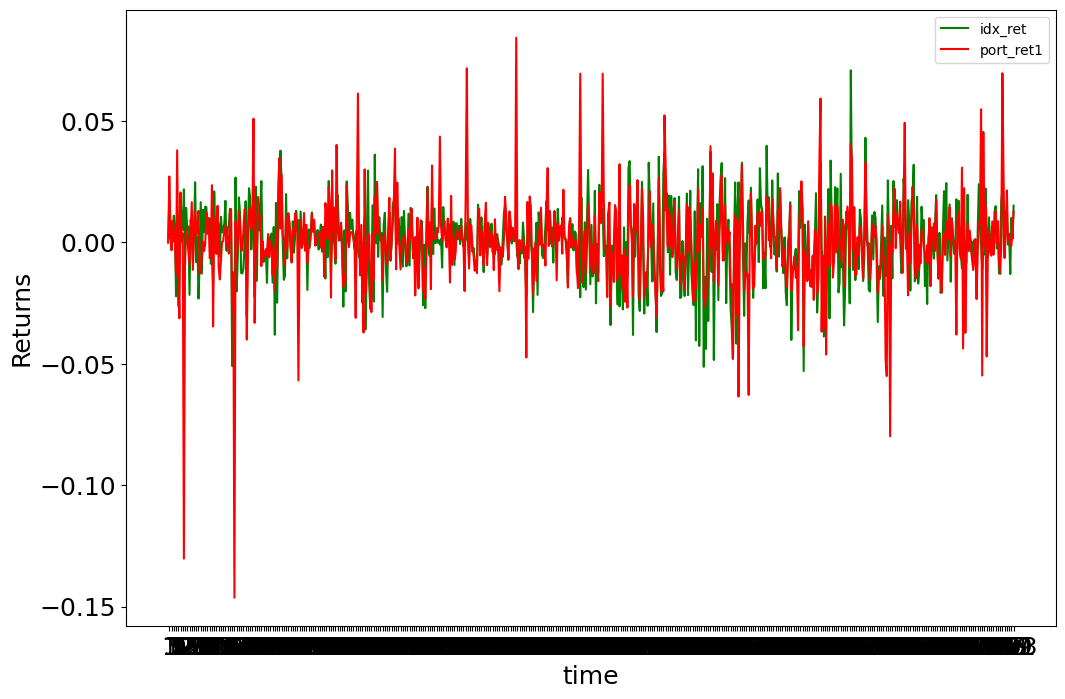

In [65]:
# Plot the returns of the index versus portfolio 1
# Number of time observations is:
numobs = len(IXIC_values)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [12,8] 
plt.plot(range(0,numobs),idx_ret,color='green', label='idx_ret')
plt.plot(range(0,numobs),port_ret1,color='red', label='port_ret1')

plt.xticks(range(1,numobs,2), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("Returns",fontsize = 18)
plt.xlabel("time", fontsize = 18)
plt.legend()

NameError: name 'port_ret2' is not defined

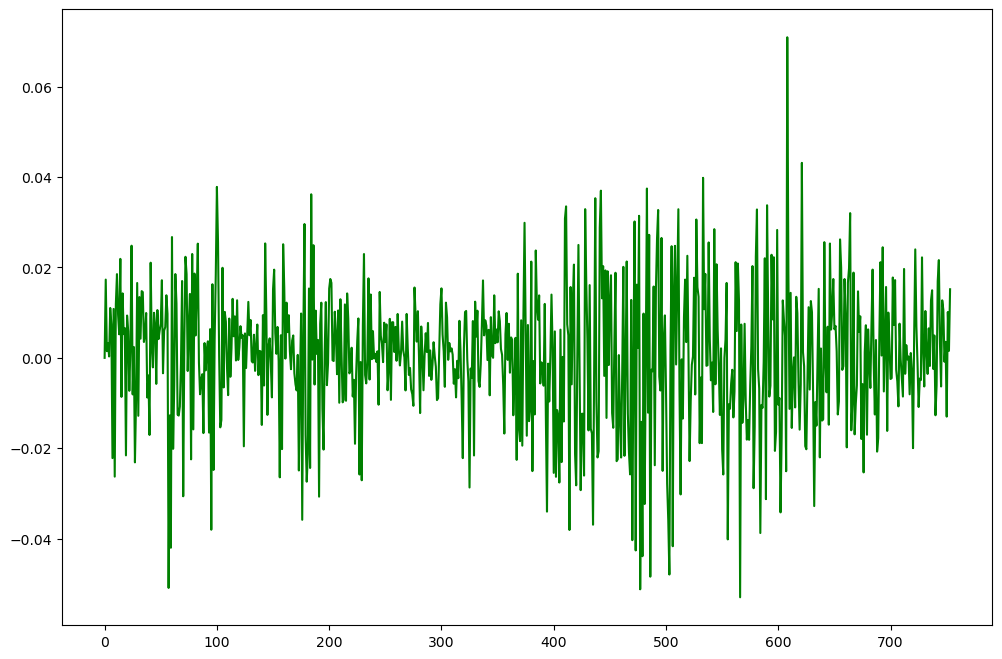

In [66]:
# Plot the returns of the index versus portfolio 2
plt.rcParams['figure.figsize'] = [12,8] 
plt.plot(range(0,numobs),idx_ret,color='green', label='idx_ret')
plt.plot(range(0,numobs),port_ret2,color='blue', label='port_ret2')
plt.xticks(range(1,numobs,2), fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylabel("Returns",fontsize = 18)
plt.xlabel("time", fontsize = 18)
plt.legend()

# Short Analysis Report